In [57]:
import requests
import pandas as pd
headers={"Referer": "http://www.gov.cn/",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36 Edg/102.0.1245.33",
         "Host": "bmfw.www.gov.cn",
         "Origin": "http://www.gov.cn"
}
url="https://bmfw.www.gov.cn/bjww/StatisSelectRedis/GDPlist.do?qinStart=2012-A&qinEnd=2022-A&qinName=%E5%9B%BD%E5%86%85%E7%94%9F%E4%BA%A7%E6%80%BB%E5%80%BC%EF%BC%88%E4%BA%BF%E5%85%83%EF%BC%89%2F%E5%9B%BD%E5%86%85%E7%94%9F%E4%BA%A7%E6%80%BB%E5%80%BC%E5%AD%A3%E5%BA%A6%E7%B4%AF%E8%AE%A1%E5%90%8C%E6%AF%94%E5%A2%9E%E9%95%BF%EF%BC%88%25%EF%BC%89%2F%E7%AC%AC%E4%B8%80%E4%BA%A7%E4%B8%9A%E5%A2%9E%E5%8A%A0%E5%80%BC%EF%BC%88%E4%BA%BF%E5%85%83%EF%BC%89%2F%E7%AC%AC%E4%B8%80%E4%BA%A7%E4%B8%9A%E5%A2%9E%E5%8A%A0%E5%80%BC%E5%AD%A3%E5%BA%A6%E7%B4%AF%E8%AE%A1%E5%90%8C%E6%AF%94%E5%A2%9E%E9%95%BF%EF%BC%88%25%EF%BC%89%2F%E7%AC%AC%E4%BA%8C%E4%BA%A7%E4%B8%9A%E5%A2%9E%E5%8A%A0%E5%80%BC%EF%BC%88%E4%BA%BF%E5%85%83%EF%BC%89%2F%E7%AC%AC%E4%BA%8C%E4%BA%A7%E4%B8%9A%E5%A2%9E%E5%8A%A0%E5%80%BC%E5%AD%A3%E5%BA%A6%E7%B4%AF%E8%AE%A1%E5%90%8C%E6%AF%94%E5%A2%9E%E9%95%BF%EF%BC%88%25%EF%BC%89%2F%E7%AC%AC%E4%B8%89%E4%BA%A7%E4%B8%9A%E5%A2%9E%E5%8A%A0%E5%80%BC%EF%BC%88%E4%BA%BF%E5%85%83%EF%BC%89%2F%E7%AC%AC%E4%B8%89%E4%BA%A7%E4%B8%9A%E5%A2%9E%E5%8A%A0%E5%80%BC%E5%AD%A3%E5%BA%A6%E7%B4%AF%E8%AE%A1%E5%90%8C%E6%AF%94%E5%A2%9E%E9%95%BF%EF%BC%88%25%EF%BC%89"
resp=requests.get(url,headers=headers)
value_list=[]
for i in resp.json()['data']:
    date_time=i['dateTime']
    values=i['values']
    values.insert(0,date_time)
    value_list.append(values)
column=['统计时间','国内生产总值（亿元）','国内生产总值季度累计同比增长（%）','第一产业增加值（亿元）','第一产业增加值季度累计同比增长（%）','第二产业增加值（亿元）','第二产业增加值季度累计同比增长（%）','第三产业增加值（亿元）','第三产业增加值季度累计同比增长（%）']
pd.DataFrame(value_list,columns=column).to_csv("GDP.csv",mode='w',encoding='gbk',index=False)
print("写入完毕")
resp.close()

写入完毕


In [58]:
df=pd.read_csv("GDP.csv",encoding='gbk')
df.head() 

,统计时间,国内生产总值（亿元）,国内生产总值季度累计同比增长（%）,第一产业增加值（亿元）,第一产业增加值季度累计同比增长（%）,第二产业增加值（亿元）,第二产业增加值季度累计同比增长（%）,第三产业增加值（亿元）,第三产业增加值季度累计同比增长（%）
0,2012第1季度,117357.6,8.1,6446.0,3.7,52316.2,9.5,58595.5,7.3
1,2012第1-2季度,248678.3,7.9,16357.3,4.3,113749.4,8.7,118571.6,7.6
2,2012第1-3季度,386767.9,7.8,31013.4,4.2,176005.6,8.3,179749.0,7.8
3,2012第1-4季度,538580.0,7.9,49084.6,4.5,244639.1,8.4,244856.2,8.0
4,2013第1季度,129449.6,7.9,6869.1,3.0,55861.2,7.8,66719.3,8.4


In [59]:
df = df.drop_duplicates()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   统计时间                41 non-null     object 
 1   国内生产总值（亿元）          41 non-null     float64
 2   国内生产总值季度累计同比增长（%）   41 non-null     float64
 3   第一产业增加值（亿元）         41 non-null     float64
 4   第一产业增加值季度累计同比增长（%）  41 non-null     float64
 5   第二产业增加值（亿元）         41 non-null     float64
 6   第二产业增加值季度累计同比增长（%）  41 non-null     float64
 7   第三产业增加值（亿元）         41 non-null     float64
 8   第三产业增加值季度累计同比增长（%）  41 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.2+ KB


In [61]:
df1=df[:][3:41:4] #拿到各年的1-4季度值
df1.head()

,统计时间,国内生产总值（亿元）,国内生产总值季度累计同比增长（%）,第一产业增加值（亿元）,第一产业增加值季度累计同比增长（%）,第二产业增加值（亿元）,第二产业增加值季度累计同比增长（%）,第三产业增加值（亿元）,第三产业增加值季度累计同比增长（%）
3,2012第1-4季度,538580.0,7.9,49084.6,4.5,244639.1,8.4,244856.2,8.0
7,2013第1-4季度,592963.2,7.8,53028.1,3.8,261951.6,8.0,277983.5,8.3
11,2014第1-4季度,643563.1,7.4,55626.3,4.1,277282.8,7.2,310654.0,8.3
15,2015第1-4季度,688858.2,7.0,57774.6,3.9,281338.9,5.9,349744.7,8.8
19,2016第1-4季度,746395.1,6.8,60139.2,3.3,295427.8,6.0,390828.1,8.1


In [62]:
import seaborn as sns
color_map = sns.light_palette('orange', as_cmap=True)
df1.describe().style.background_gradient(color_map) #2012-2021年的信息

,国内生产总值（亿元）,国内生产总值季度累计同比增长（%）,第一产业增加值（亿元）,第一产业增加值季度累计同比增长（%）,第二产业增加值（亿元）,第二产业增加值季度累计同比增长（%）,第三产业增加值（亿元）,第三产业增加值季度累计同比增长（%）
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,810784.770000,6.690000,63381.070000,4.030000,327288.630000,6.290000,420115.070000,7.530000
std,201257.471865,1.669631,10864.353200,1.176671,66274.538518,1.764747,125175.893553,1.949387
min,538580.000000,2.300000,49084.600000,3.000000,244639.100000,2.600000,244856.200000,2.100000
25%,654886.875000,6.725000,56163.375000,3.350000,278296.825000,5.825000,320426.675000,8.000000
50%,789215.500000,6.950000,61119.350000,3.850000,313504.150000,5.950000,414592.000000,8.150000
75%,969706.675000,7.700000,69041.500000,4.075000,376711.750000,7.800000,523953.450000,8.300000
max,1143669.700000,8.100000,83085.500000,7.100000,450904.500000,8.400000,609679.700000,8.800000


In [63]:
#制作各年份的透视表并拿到国内生产总值季度累计同比增长（%）降序排列
df2= pd.pivot_table(df1[['国内生产总值季度累计同比增长（%）','统计时间']],index='统计时间')
df2.sort_values('国内生产总值季度累计同比增长（%）',inplace=True,ascending=False)
df2.head(len(df2.index))

,国内生产总值季度累计同比增长（%）
统计时间,
2021第1-4季度,8.1
2012第1-4季度,7.9
2013第1-4季度,7.8
2014第1-4季度,7.4
2015第1-4季度,7.0
2017第1-4季度,6.9
2016第1-4季度,6.8
2018第1-4季度,6.7
2019第1-4季度,6.0


In [64]:
#制作各年份的透视表并拿到第一产业增加值季度累计同比增长（%）降序排列
df3= pd.pivot_table(df1[['第一产业增加值季度累计同比增长（%）','统计时间']],index='统计时间')
df3.sort_values('第一产业增加值季度累计同比增长（%）',inplace=True,ascending=False)
df3.head(len(df3.index))

,第一产业增加值季度累计同比增长（%）
统计时间,
2021第1-4季度,7.1
2012第1-4季度,4.5
2014第1-4季度,4.1
2017第1-4季度,4.0
2015第1-4季度,3.9
2013第1-4季度,3.8
2018第1-4季度,3.5
2016第1-4季度,3.3
2019第1-4季度,3.1


In [65]:
#制作各年份的透视表并拿到第二产业增加值季度累计同比增长（%）降序排列
df4= pd.pivot_table(df1[['第二产业增加值季度累计同比增长（%）','统计时间']],index='统计时间')
df4.sort_values('第二产业增加值季度累计同比增长（%）',inplace=True,ascending=False)
df4.head(len(df4.index))

,第二产业增加值季度累计同比增长（%）
统计时间,
2012第1-4季度,8.4
2021第1-4季度,8.2
2013第1-4季度,8.0
2014第1-4季度,7.2
2016第1-4季度,6.0
2015第1-4季度,5.9
2017第1-4季度,5.9
2018第1-4季度,5.8
2019第1-4季度,4.9


In [66]:
#制作各年份的透视表并拿到第三产业增加值季度累计同比增长（%）降序排列
df5= pd.pivot_table(df1[['第三产业增加值季度累计同比增长（%）','统计时间']],index='统计时间')
df5.sort_values('第三产业增加值季度累计同比增长（%）',inplace=True,ascending=False)
df5.head(len(df5.index))

,第三产业增加值季度累计同比增长（%）
统计时间,
2015第1-4季度,8.8
2013第1-4季度,8.3
2014第1-4季度,8.3
2017第1-4季度,8.3
2021第1-4季度,8.2
2016第1-4季度,8.1
2012第1-4季度,8.0
2018第1-4季度,8.0
2019第1-4季度,7.2


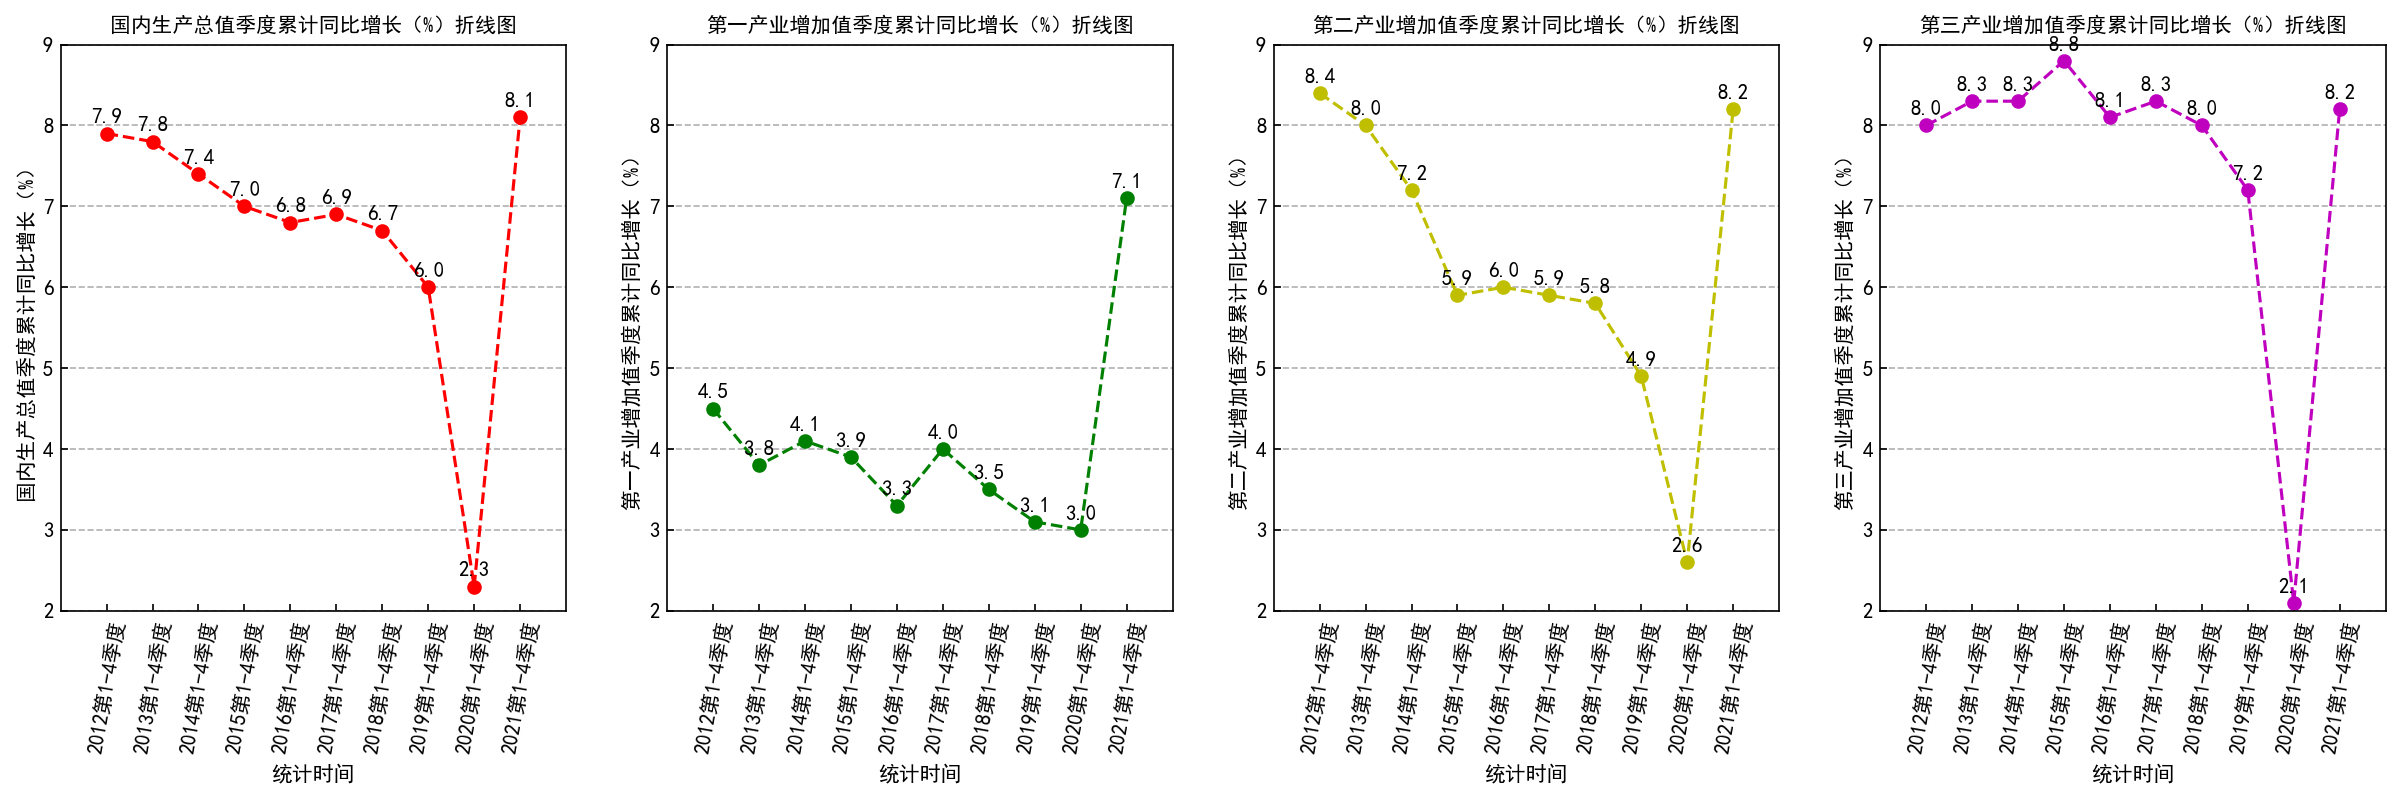

In [67]:
# 各年份国内生产总值季度累计同比增长（%），第一产业，第二产业，第三产业的增加值季度累计同比增长（%）曲线图
import matplotlib.pyplot as plt
import numpy as np
pl=plt.figure(figsize=(20,5),dpi=150) #创建一块画布
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['xtick.direction']='in' 
plt.rcParams['ytick.direction']='in'

ax1=pl.add_subplot(1,4,1) 
data=np.arange(1,11)
x=df1['统计时间']
y=df1['国内生产总值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('国内生产总值季度累计同比增长（%）')
plt.xlim((0,11))
plt.ylim((2,9))
plt.xticks(range(1,11,1),x,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("国内生产总值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data,y,'ro--')
for a,b in zip(data,y):
    plt.text(a,b+0.2,b,ha='center',va='center')

ax2=pl.add_subplot(1,4,2) 
data1=np.arange(1,11)
x1=df1['统计时间']
y1=df1['第一产业增加值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('第一产业增加值季度累计同比增长（%）')
plt.xlim((0,11))
plt.ylim((2,9))
plt.xticks(range(1,11,1),x1,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("第一产业增加值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data1,y1,'go--')
for a,b in zip(data1,y1):
    plt.text(a,b+0.2,b,ha='center',va='center')
    
ax3=pl.add_subplot(1,4,3) 
data2=np.arange(1,11)
x2=df1['统计时间']
y2=df1['第二产业增加值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('第二产业增加值季度累计同比增长（%）')
plt.xlim((0,11))
plt.ylim((2,9))
plt.xticks(range(1,11,1),x2,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("第二产业增加值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data1,y2,'yo--')
for a,b in zip(data2,y2):
    plt.text(a,b+0.2,b,ha='center',va='center')
    
ax4=pl.add_subplot(1,4,4) 
data3=np.arange(1,11)
x3=df1['统计时间']
y3=df1['第三产业增加值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('第三产业增加值季度累计同比增长（%）')
plt.xlim((0,11))
plt.ylim((2,9))
plt.xticks(range(1,11,1),x3,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("第三产业增加值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data1,y3,'mo--')
for a,b in zip(data3,y3):
    plt.text(a,b+0.2,b,ha='center',va='center')

plt.show()

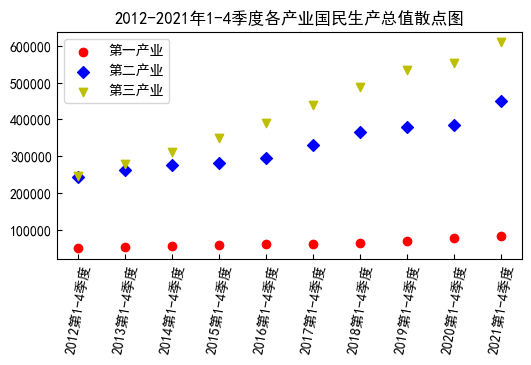

In [68]:
# 2012-2021年1-4季度各产业国民生产总值散点图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pl=plt.figure(figsize=(6,3),dpi=100)
plt.title("2012-2021年1-4季度各产业国民生产总值散点图")
plt.scatter(range(1,11,1),df1.loc[range(3,41,4),'第一产业增加值（亿元）'],marker='o',c='r')
plt.scatter(range(1,11,1),df1.loc[range(3,41,4),'第二产业增加值（亿元）'],marker='D',c='b')
plt.scatter(range(1,11,1),df1.loc[range(3,41,4),'第三产业增加值（亿元）'],marker='v',c='y')
plt.legend(['第一产业','第二产业','第三产业'])
plt.xticks(range(1,11,1),df1['统计时间'],rotation=80)
plt.show()

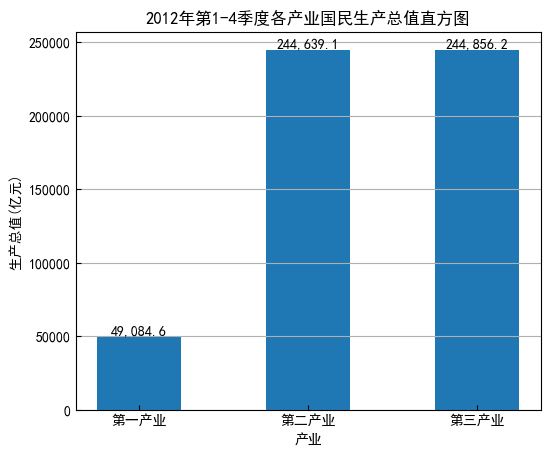

In [69]:
# 2012年1-4季度国内生产总值各产业国民生产总值直方图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(6,5),dpi=100)
data=[df1.loc[3,'第一产业增加值（亿元）'],df1.loc[3,'第二产业增加值（亿元）'],df1.loc[3,'第三产业增加值（亿元）']]
x=range(1,4)
plt.bar(x,data,width=0.5)
plt.title("2012年第1-4季度各产业国民生产总值直方图")
plt.xlabel("产业")
plt.ylabel("生产总值(亿元)")
plt.grid(axis='y')
for a,b in zip(x,data):
    plt.text(a,b,format(b,','),ha='center',va='bottom')
plt.xticks(x,['第一产业','第二产业','第三产业'])
plt.show()

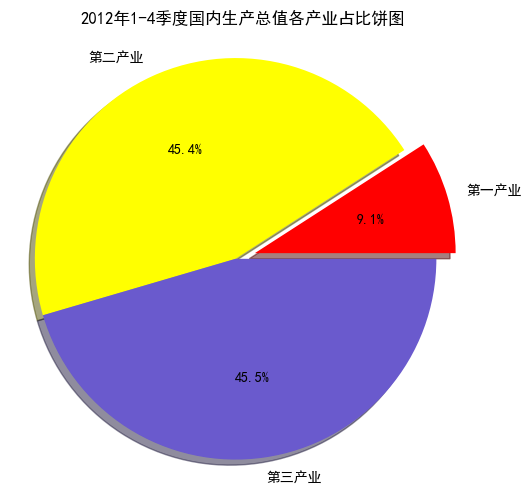

In [70]:
# 2012年1-4季度国内生产总值各产业占比饼图
import matplotlib.pyplot as plot
plt.figure(figsize=(6,6),dpi=100)
plt.rcParams['font.sans-serif']=['SimHei']
colors=['red','yellow','slateblue']
data=[df1.loc[3,'第一产业增加值（亿元）'],df1.loc[3,'第二产业增加值（亿元）'],df1.loc[3,'第三产业增加值（亿元）']]
plt.pie(data,labels=['第一产业','第二产业','第三产业'],explode=[0.1,0,0],shadow=True,colors=colors,autopct='%.1f%%',startangle=0)
plt.axis('equal')
plt.title("2012年1-4季度国内生产总值各产业占比饼图")
plt.show()

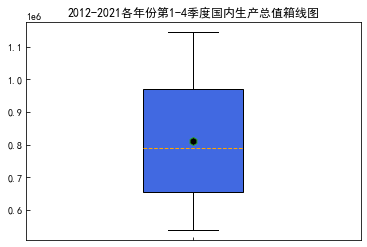

In [71]:
#2012-2021各年份第1-4季度国内生产总值箱线图
import matplotlib.pyplot as plt
plt.boxplot(x=df.loc[range(3,41,4),'国内生产总值（亿元）'],
            whis=1.5,  
            widths=0.3,
            patch_artist=True, 
            showmeans=True, 
            boxprops={'facecolor':'RoyalBlue'}, 
            flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':3},
            meanprops={'marker':'h','markerfacecolor':'black','markersize':8},
            medianprops={'linestyle':'--','color':'orange'},
            labels=[''])
plt.title("2012-2021各年份第1-4季度国内生产总值箱线图")
plt.show()

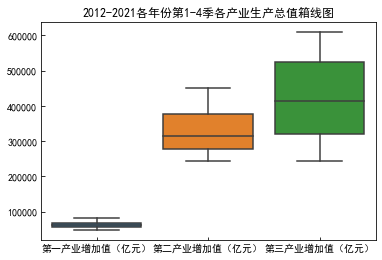

In [72]:
#2012-2021各年份第1-4季各产业生产总值箱线图
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
data=pd.DataFrame([df1.loc[range(3,41,4),'第一产业增加值（亿元）'],df1.loc[range(3,41,4),'第二产业增加值（亿元）'],df1.loc[range(3,41,4),'第三产业增加值（亿元）']])
sns.boxplot(data=data.T)
plt.title("2012-2021各年份第1-4季各产业生产总值箱线图")
plt.show()

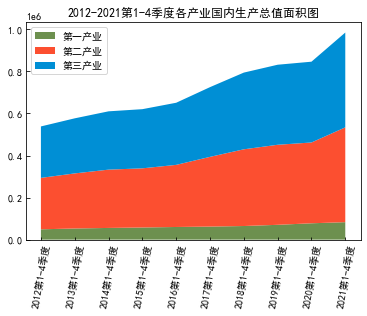

In [73]:
#2012-2021第1-4季度各产业国内生产总值面积图
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']='SimHei'
x=range(1,11)
y1=df1.loc[range(3,41,4),'第一产业增加值（亿元）']
y2=df1.loc[range(3,41,4),'第二产业增加值（亿元）']
y3=df1.loc[range(3,41,4),'第二产业增加值（亿元）']
plt.stackplot(x,y1,y2,y3,colors=['#6d904f','#fc4f30','#008fd5'])
plt.legend(['第一产业','第二产业','第三产业'],loc='upper left')
plt.xticks(x,df1['统计时间'],rotation=80)
plt.title("2012-2021第1-4季度各产业国内生产总值面积图")
plt.show()

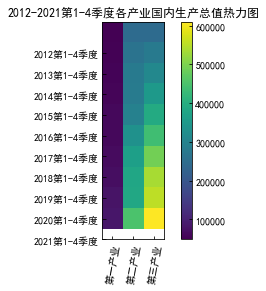

In [74]:
#2012-2021第1-4季度各产业国内生产总值热力图
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']='SimHei'
data=pd.DataFrame([df1.loc[range(3,41,4),'第一产业增加值（亿元）'],df1.loc[range(3,41,4),'第二产业增加值（亿元）'],df1.loc[range(3,41,4),'第三产业增加值（亿元）']])
plt.imshow(data.T)
plt.xticks(range(0,3,1),['第一产业','第二产业','第三产业'],rotation=80)
plt.yticks(range(1,11),df1['统计时间'])
plt.colorbar() #显示颜色条
plt.title("2012-2021第1-4季度各产业国内生产总值热力图")
plt.show()

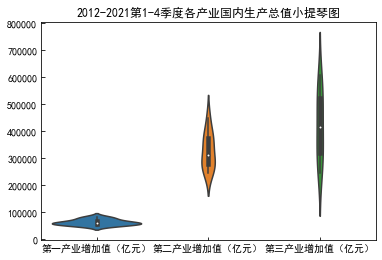

In [75]:
#2012-2021第1-4季度各产业国内生产总值小提琴图
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.DataFrame([df1.loc[range(3,41,4),'第一产业增加值（亿元）'],df1.loc[range(3,41,4),'第二产业增加值（亿元）'],df1.loc[range(3,41,4),'第三产业增加值（亿元）']])
sns.violinplot(data=data.T) #使用sns.volinplot绘制小提琴图，粗黑线表示四分位数范围，延伸细线表示95%置信区间，白点位中位数
plt.title("2012-2021第1-4季度各产业国内生产总值小提琴图")
plt.show()

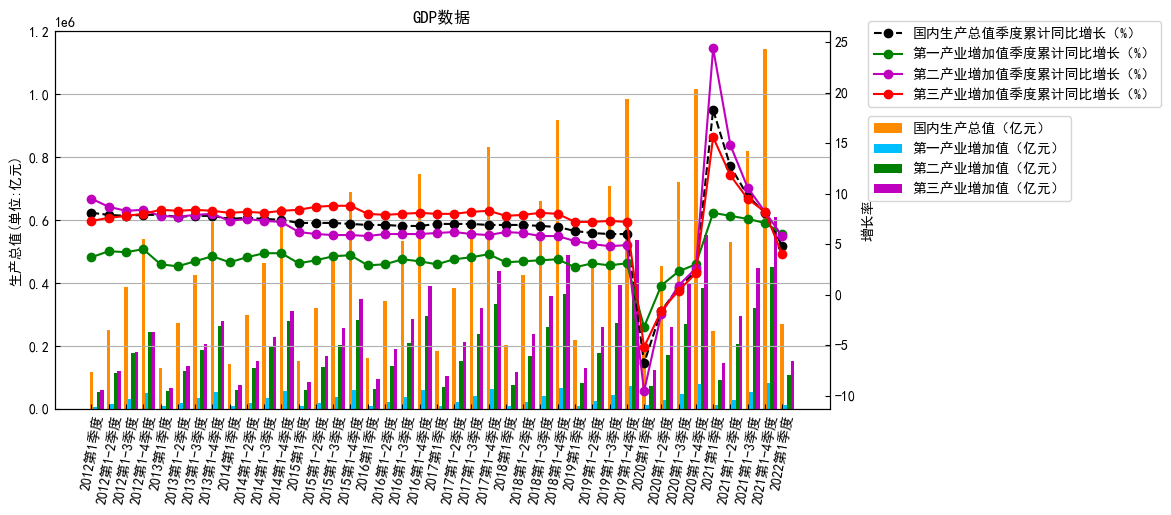

In [76]:
#总的数据GDP视图分析
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pl=plt.figure(figsize=(10,5),dpi=100)
ax1=pl.add_subplot(111)
width=0.2
plt.grid(axis='y')
x=np.arange(41)
plt.title("GDP数据")
plt.bar(x,df['国内生产总值（亿元）'],width=width,color='darkorange')
plt.bar(x+width,df['第一产业增加值（亿元）'],width=width,color='deepskyblue') 
plt.bar(x+2*width,df['第二产业增加值（亿元）'],width=width,color='g') 
plt.bar(x+3*width,df['第三产业增加值（亿元）'],width=width,color='m') 
plt.xticks(x,df['统计时间'],rotation=80)
ax1.set_ylabel('生产总值(单位:亿元)')
plt.legend(['国内生产总值（亿元）','第一产业增加值（亿元）','第二产业增加值（亿元）','第三产业增加值（亿元）'],loc=(1.05,0.55))
ax2=ax1.twinx()  #ax1和ax2共享x轴
ax2.plot(df['统计时间'],df['国内生产总值季度累计同比增长（%）'],'ko--',x,df['第一产业增加值季度累计同比增长（%）'],'go-',x,df['第二产业增加值季度累计同比增长（%）'],'mo-',x,df['第三产业增加值季度累计同比增长（%）'],'ro-')
ax2.set_ylabel('增长率')
plt.legend(['国内生产总值季度累计同比增长（%）','第一产业增加值季度累计同比增长（%）','第二产业增加值季度累计同比增长（%）','第三产业增加值季度累计同比增长（%）'],loc=(1.05,0.8))
plt.show()